In [1]:
import pandas as pd

datasets = {
    "USO": "../raw_data/USO.csv",
    "GLD": "../raw_data/GLD.csv",
    "S&P": "../raw_data/S&P.csv",
    "Gold": "../raw_data/Gold.csv",
    "Silver": "../raw_data/Silver.csv",
    "Copper": "../raw_data/Copper.csv",
    "US_Dollor_Index": "../raw_data/US Dollar Index.csv"
}

dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

for name, df in dataframes.items():
    print(f"\nDataset: {name}")
    print("-" * 50)
    print("First 5 rows:")
    print(df.head(), "\n")
    print("Info:")
    print(df.info(), "\n")
    print("Missing Values:")
    print(df.isnull().sum(), "\n")


Dataset: USO
--------------------------------------------------
First 5 rows:
         Date  Price   Open   High    Low   Vol. Change %
0  11/25/2024  72.14  72.92  73.44  71.97  1.89M   -2.84%
1  11/22/2024  74.25  73.10  74.58  72.94  2.57M    1.43%
2  11/21/2024  73.20  73.13  73.26  72.39  1.85M    1.64%
3  11/20/2024  72.02  72.84  72.84  71.60  1.36M   -0.40%
4  11/19/2024  72.31  72.40  72.71  71.40  3.96M    0.33% 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4713 entries, 0 to 4712
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4713 non-null   object 
 1   Price     4713 non-null   float64
 2   Open      4713 non-null   float64
 3   High      4713 non-null   float64
 4   Low       4713 non-null   float64
 5   Vol.      4689 non-null   object 
 6   Change %  4713 non-null   object 
dtypes: float64(4), object(3)
memory usage: 257.9+ KB
None 

Missing Values:
Date         0
Price        0
O

As we can see the Vol. column (the volumn that such a thing traded in a day) is the only that contains missing values and it won't add a significant value in our foecasting, so let's just delete it.

# Data preparation

In [2]:
# Dropping the 'Vol.' column from all datasets
for name, df in dataframes.items():
    if 'Vol.' in df.columns:
        df.drop(columns=['Vol.'], inplace=True)

In [3]:
for name, df in dataframes.items():
    print(f"{name} dataset")
    print(df.isnull().sum(), "\n")

USO dataset
Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64 

GLD dataset
Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64 

S&P dataset
Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64 

Gold dataset
Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64 

Silver dataset
Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64 

Copper dataset
Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64 

US_Dollor_Index dataset
Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64 



Now our datasets have zero missing values

Now let's change prices columns type from object to numeric and date columns from object to datetime

In [4]:
for df_name, df in dataframes.items():
    for col in ['Price', 'Open', 'High', 'Low']:
        if col in df.columns:
            df[col] = df[col].replace({',': ''}, regex=True)  # Removing commas from price columns
            df[col] = pd.to_numeric(df[col], errors='coerce')  
    
    if 'Change %' in df.columns:
        df['Change %'] = df['Change %'].replace({'%': ''}, regex=True)  
        df['Change %'] = pd.to_numeric(df['Change %'], errors='coerce') 
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')


    print("")  
    print(f"DataFrame: {df_name}")
    print(df.head()) 
    print("Dataframe info:")
    print(df.info(), "\n")



DataFrame: USO
        Date  Price   Open   High    Low  Change %
0 2024-11-25  72.14  72.92  73.44  71.97     -2.84
1 2024-11-22  74.25  73.10  74.58  72.94      1.43
2 2024-11-21  73.20  73.13  73.26  72.39      1.64
3 2024-11-20  72.02  72.84  72.84  71.60     -0.40
4 2024-11-19  72.31  72.40  72.71  71.40      0.33
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4713 entries, 0 to 4712
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4713 non-null   datetime64[ns]
 1   Price     4713 non-null   float64       
 2   Open      4713 non-null   float64       
 3   High      4713 non-null   float64       
 4   Low       4713 non-null   float64       
 5   Change %  4713 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 221.1 KB
None 


DataFrame: GLD
        Date   Price    Open    High     Low  Change %
0 2024-08-23  232.02  231.04  232.73  230.52     

Let's see now the date range for each dataset

In [5]:
for name, df in dataframes.items():
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
    
    min_date = df['Date'].min()
    max_date = df['Date'].max()
    
    print(f"\n{name} Dataset Date Range:")
    print(f"Start Date: {min_date}")
    print(f"End Date: {max_date}")
    
    expected_row_count = (max_date - min_date).days + 1
    
    actual_row_count = df.shape[0]
    missing_rows = expected_row_count - actual_row_count
    
    print(f"{name} dataset:")
    print(f"  - Expected rows: {expected_row_count}")
    print(f"  - Actual rows: {actual_row_count}")
    print(f"  - Missing rows: {missing_rows}")
    




USO Dataset Date Range:
Start Date: 2006-04-11 00:00:00
End Date: 2024-11-25 00:00:00
USO dataset:
  - Expected rows: 6804
  - Actual rows: 4713
  - Missing rows: 2091

GLD Dataset Date Range:
Start Date: 2004-11-19 00:00:00
End Date: 2024-08-23 00:00:00
GLD dataset:
  - Expected rows: 7218
  - Actual rows: 4999
  - Missing rows: 2219

S&P Dataset Date Range:
Start Date: 2000-01-03 00:00:00
End Date: 2024-11-25 00:00:00
S&P dataset:
  - Expected rows: 9094
  - Actual rows: 6265
  - Missing rows: 2829

Gold Dataset Date Range:
Start Date: 2000-01-04 00:00:00
End Date: 2024-11-25 00:00:00
Gold dataset:
  - Expected rows: 9093
  - Actual rows: 6311
  - Missing rows: 2782

Silver Dataset Date Range:
Start Date: 2000-01-04 00:00:00
End Date: 2024-11-25 00:00:00
Silver dataset:
  - Expected rows: 9093
  - Actual rows: 6379
  - Missing rows: 2714

Copper Dataset Date Range:
Start Date: 2000-01-04 00:00:00
End Date: 2024-12-06 00:00:00
Copper dataset:
  - Expected rows: 9104
  - Actual rows: 

As we see the datasets have different date ranges and they have missing dates, let's fill the missing dates with linear interpolation for each dataset.

In [6]:
for name, df in dataframes.items():
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    df_resampled = df.resample('D').asfreq()  
    df_interpolated = df_resampled.interpolate(method='linear')  # Linear interpolation

    dataframes[name] = df_interpolated.reset_index() 

    print(f"{name} - After Interpolation:")
    print(dataframes[name].head())


USO - After Interpolation:
        Date   Price    Open    High     Low  Change %
0 2006-04-11  545.60  546.56  547.12  538.40    0.2600
1 2006-04-12  542.72  545.76  550.48  542.48   -0.5300
2 2006-04-13  550.56  540.00  551.92  539.20    1.4400
3 2006-04-14  552.50  543.40  553.74  541.76    1.4325
4 2006-04-15  554.44  546.80  555.56  544.32    1.4250
GLD - After Interpolation:
        Date      Price       Open       High    Low  Change %
0 2004-11-19  44.780000  44.490000  44.920000  44.47  0.900000
1 2004-11-20  44.836667  44.576667  44.936667  44.56  0.726667
2 2004-11-21  44.893333  44.663333  44.953333  44.65  0.553333
3 2004-11-22  44.950000  44.750000  44.970000  44.74  0.380000
4 2004-11-23  44.750000  44.880000  44.920000  44.72 -0.440000
S&P - After Interpolation:
        Date   Price    Open    High     Low  Change %
0 2000-01-03  1455.2  1469.2  1478.0  1438.4     -0.95
1 2000-01-04  1399.4  1455.2  1455.2  1397.4     -3.83
2 2000-01-05  1402.1  1399.4  1413.3  1377.7  

Let's now verify that there aren't missing dates after we did linear interpolation

In [7]:
for name, df in dataframes.items():
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
    
    min_date = df['Date'].min()
    max_date = df['Date'].max()
    
    print(f"\n{name} Dataset Date Range:")
    print(f"Start Date: {min_date}")
    print(f"End Date: {max_date}")
    
    expected_row_count = (max_date - min_date).days + 1
    
    actual_row_count = df.shape[0]
    missing_rows = expected_row_count - actual_row_count
    
    print(f"{name} dataset:")
    print(f"  - Expected rows: {expected_row_count}")
    print(f"  - Actual rows: {actual_row_count}")
    print(f"  - Missing rows: {missing_rows}")
    


USO Dataset Date Range:
Start Date: 2006-04-11 00:00:00
End Date: 2024-11-25 00:00:00
USO dataset:
  - Expected rows: 6804
  - Actual rows: 6804
  - Missing rows: 0

GLD Dataset Date Range:
Start Date: 2004-11-19 00:00:00
End Date: 2024-08-23 00:00:00
GLD dataset:
  - Expected rows: 7218
  - Actual rows: 7218
  - Missing rows: 0

S&P Dataset Date Range:
Start Date: 2000-01-03 00:00:00
End Date: 2024-11-25 00:00:00
S&P dataset:
  - Expected rows: 9094
  - Actual rows: 9094
  - Missing rows: 0

Gold Dataset Date Range:
Start Date: 2000-01-04 00:00:00
End Date: 2024-11-25 00:00:00
Gold dataset:
  - Expected rows: 9093
  - Actual rows: 9093
  - Missing rows: 0

Silver Dataset Date Range:
Start Date: 2000-01-04 00:00:00
End Date: 2024-11-25 00:00:00
Silver dataset:
  - Expected rows: 9093
  - Actual rows: 9093
  - Missing rows: 0

Copper Dataset Date Range:
Start Date: 2000-01-04 00:00:00
End Date: 2024-12-06 00:00:00
Copper dataset:
  - Expected rows: 9104
  - Actual rows: 9104
  - Missin

# Feature selection and anlysis

Correlation analysis

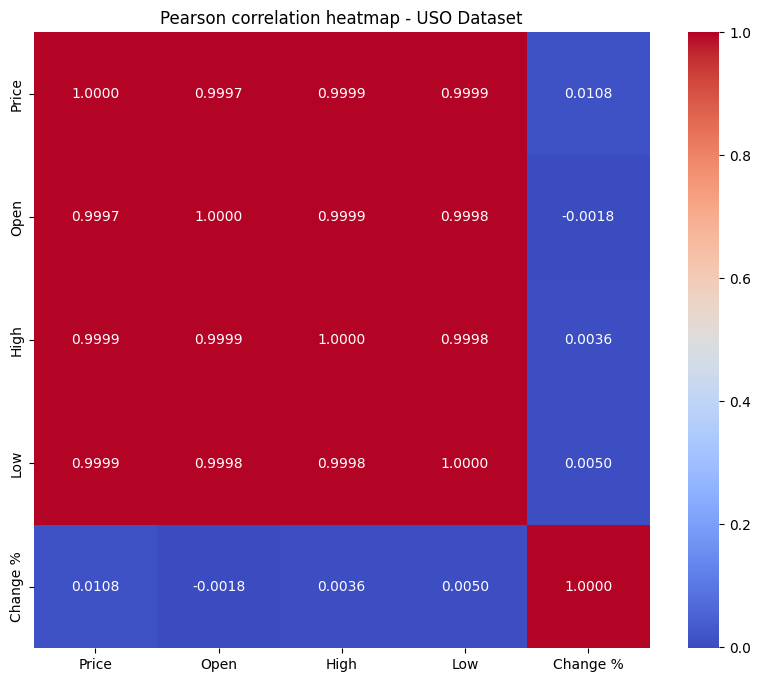

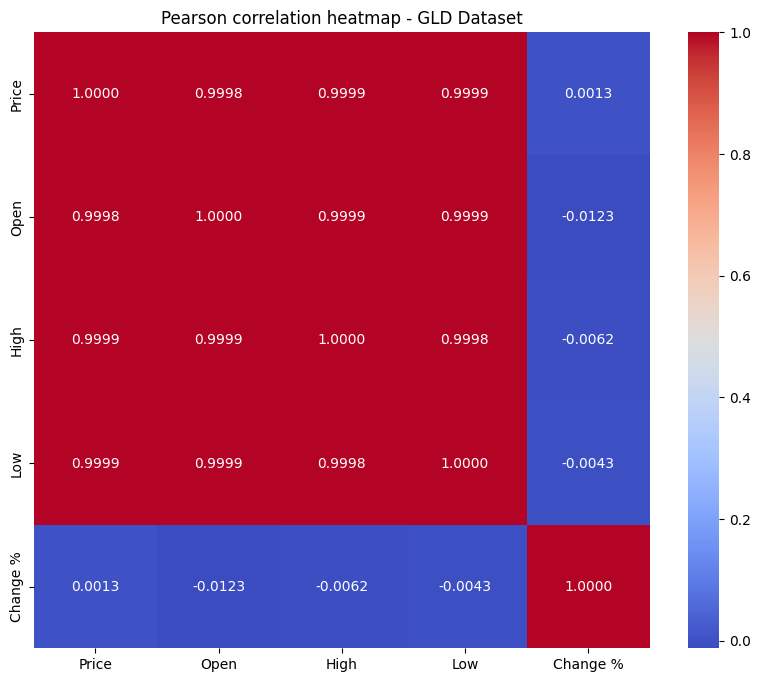

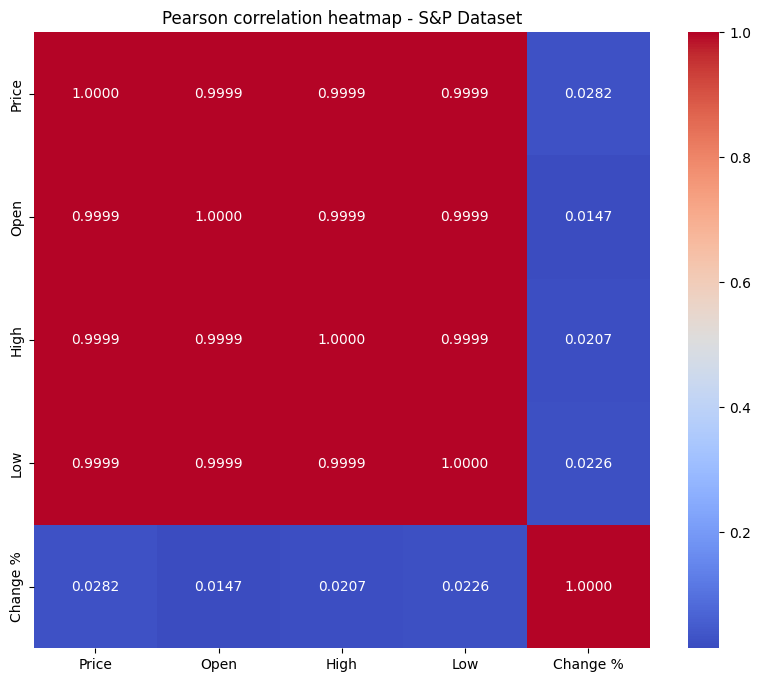

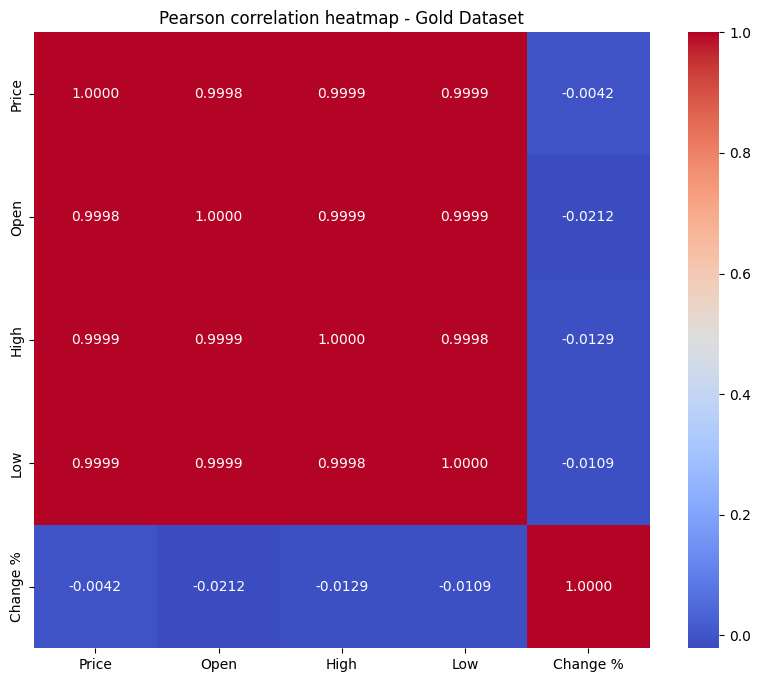

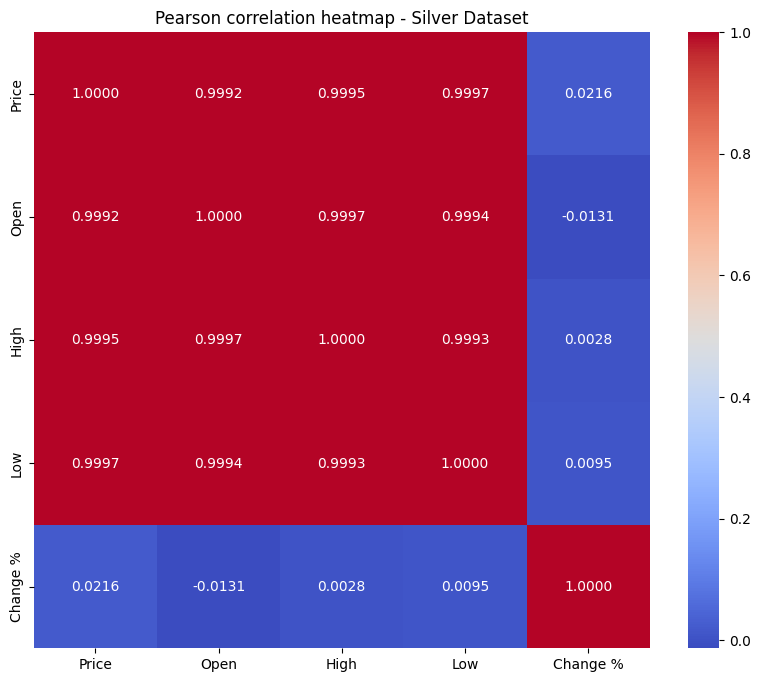

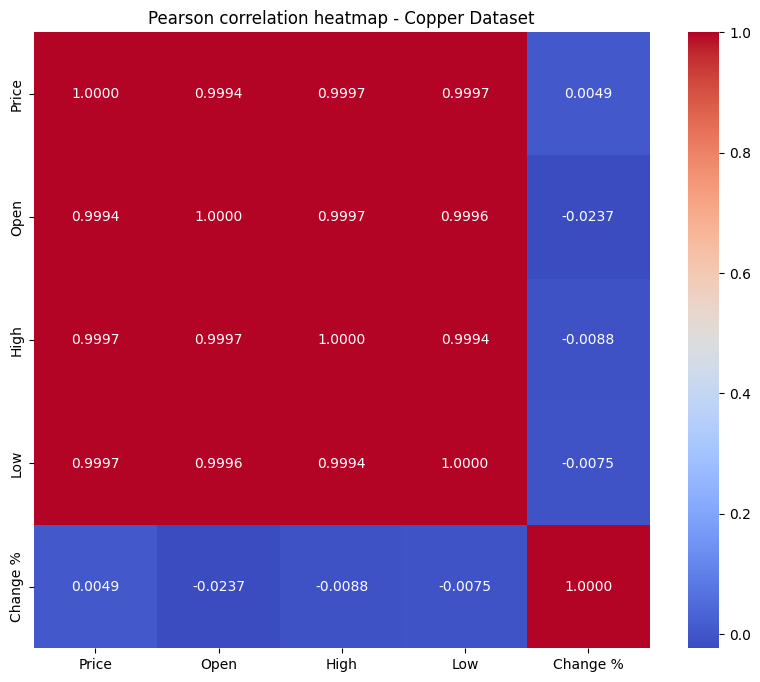

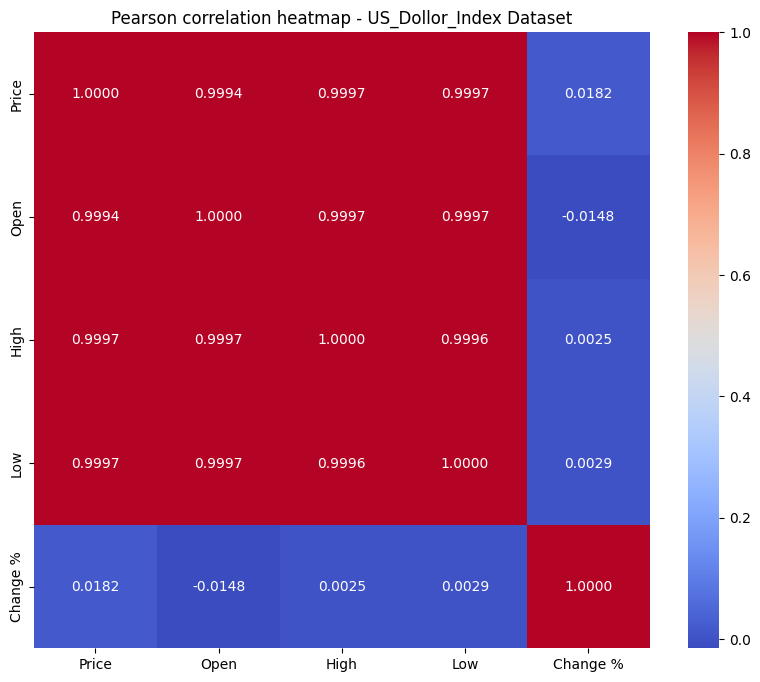

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_results = {}

for name, df in dataframes.items():
    numeric_df = df.drop(columns=["Date"])
    
    corr_matrix = numeric_df.corr()
    
    correlation_results[name] = corr_matrix
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap="coolwarm", cbar=True, square=True)
    plt.title(f"Pearson correlation heatmap - {name} Dataset")
    plt.show()



In all datasets, Price, Open, High, and Low are highly correlated (values close to 1).
And change % is very low correlated to these prices and to Price column in particular, so let's just work with Price column for each dataset.

But before we combine these prices columns into one single dataset, we have to decide which date range to go with. So let's see the correlation between these price columns to choose which ones to keep.

In [9]:
# In order to calculate correlations between Price columns, they should be in the same date range
min_date = max(df['Date'].min() for df in dataframes.values())
max_date = min(df['Date'].max() for df in dataframes.values())

print(f"Datasets will be aligned to these common date range: {min_date.date()} to {max_date.date()}")

Datasets will be aligned to these common date range: 2006-04-11 to 2024-08-23


In [10]:
common_date_dataframes = dataframes
for name, df in dataframes.items():
    common_date_dataframes[name] = df[(df['Date'] >= min_date) & (df['Date'] <= max_date)]

In [11]:
for name, df in common_date_dataframes.items():
    min_date = df['Date'].min()
    max_date = df['Date'].max()
    
    print(f"\n{name} Dataset Date Range:")
    print(f"Start Date: {min_date}")
    print(f"End Date: {max_date}")


USO Dataset Date Range:
Start Date: 2006-04-11 00:00:00
End Date: 2024-08-23 00:00:00

GLD Dataset Date Range:
Start Date: 2006-04-11 00:00:00
End Date: 2024-08-23 00:00:00

S&P Dataset Date Range:
Start Date: 2006-04-11 00:00:00
End Date: 2024-08-23 00:00:00

Gold Dataset Date Range:
Start Date: 2006-04-11 00:00:00
End Date: 2024-08-23 00:00:00

Silver Dataset Date Range:
Start Date: 2006-04-11 00:00:00
End Date: 2024-08-23 00:00:00

Copper Dataset Date Range:
Start Date: 2006-04-11 00:00:00
End Date: 2024-08-23 00:00:00

US_Dollor_Index Dataset Date Range:
Start Date: 2006-04-11 00:00:00
End Date: 2024-08-23 00:00:00


In [12]:
price_data = {name: df[['Date', 'Price']].rename(columns={'Price': f'{name}_Price'}).set_index('Date') 
              for name, df in common_date_dataframes.items()}

# Combining
combined_prices = pd.concat(price_data.values(), axis=1)

In [13]:
combined_prices

,USO_Price,GLD_Price,S&P_Price,Gold_Price,Silver_Price,Copper_Price,US_Dollor_Index_Price
Date,,,,,,,
2006-04-11,545.60,59.0100,1286.60,599.400,12.6000,2.720500,89.1500
2006-04-12,542.72,59.4300,1288.10,601.300,12.6630,2.769500,89.3100
2006-04-13,550.56,59.5000,1289.10,600.100,12.8550,2.811500,89.3700
2006-04-14,552.50,59.8975,1288.15,604.775,12.9825,2.831875,89.1175
2006-04-15,554.44,60.2950,1287.20,609.450,13.1100,2.852250,88.8650
...,...,...,...,...,...,...,...
2024-08-19,74.38,231.6100,5608.25,2541.300,29.7320,4.220000,101.7310
2024-08-20,73.83,232.4600,5597.12,2550.600,29.9530,4.201000,101.2990
2024-08-21,72.60,232.1500,5620.85,2547.500,29.9710,4.226500,100.9100


In [14]:
main_dataset = combined_prices.copy()

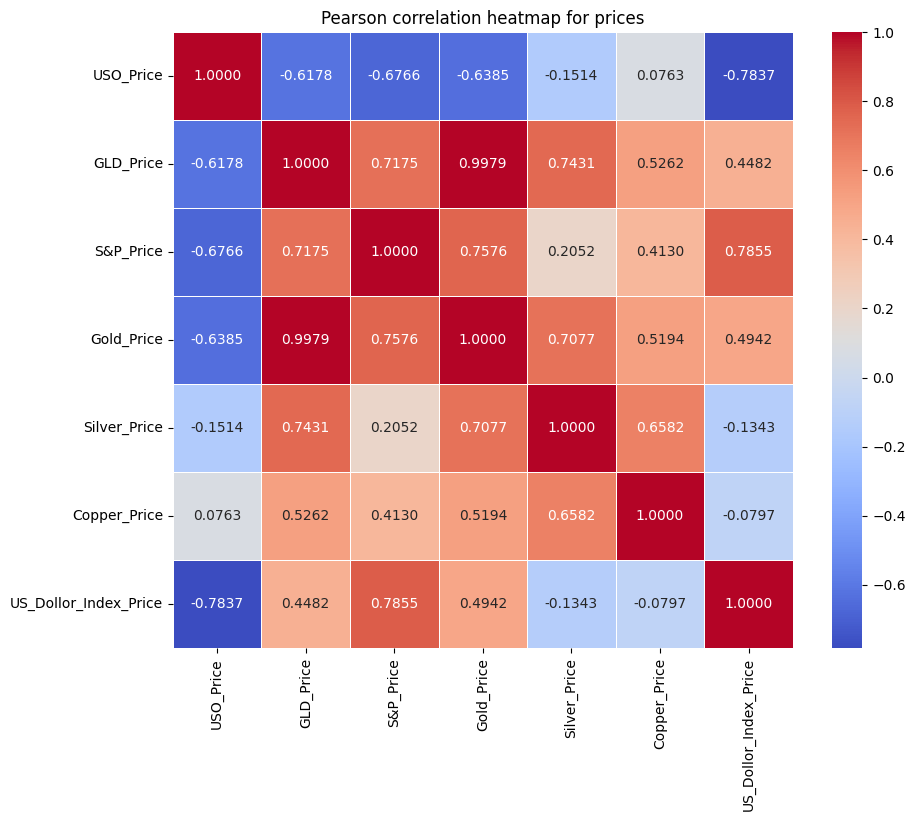

In [15]:
price_corr = combined_prices.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(price_corr, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title("Pearson correlation heatmap for prices")
plt.show()

We can see a high Correlations Between Features:
- GLD_Price is highly correlated with Gold_Price (0.998) and Silver_Price (0.743).
- S&P_Price and US_Dollor_Index_Price have a strong correlation (0.786).

Let's calculate Variance inflation factor (VIF) to detect multicollinearity.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = combined_prices.drop(columns=['Gold_Price']) 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                 feature         VIF
0              USO_Price    8.965088
1              GLD_Price  171.408804
2              S&P_Price   37.566707
3           Silver_Price  101.844100
4           Copper_Price   97.999815
5  US_Dollor_Index_Price   35.806122


We got (VIF = 171.41) for GLD_Price , which is extremely high multicollinearity, likely because it's almost perfectly correlated with Gold_Price (the target). 

So let's Drop GLD_Price since it has the highest VIF and is almost perfectly correlated with the target.

In [17]:
combined_prices.drop(columns=['GLD_Price'], inplace=True)

Recalculating the VIF

In [18]:
X = combined_prices.drop(columns=['Gold_Price'])  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                 feature        VIF
0              USO_Price   8.821192
1              S&P_Price  22.721006
2           Silver_Price  26.832292
3           Copper_Price  91.648294
4  US_Dollor_Index_Price  22.099918


Let's remove the Copper_Price feature with the highest VIF to reduce redundancy.

In [19]:
#combined_prices.drop(columns=['Copper_Price'], inplace=True)

In [20]:
X = combined_prices.drop(columns=['Gold_Price'])  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                 feature        VIF
0              USO_Price   8.821192
1              S&P_Price  22.721006
2           Silver_Price  26.832292
3           Copper_Price  91.648294
4  US_Dollor_Index_Price  22.099918


So now let's remove the US_Dollor_Index_Price  feature with the highest VIF 

In [21]:
combined_prices.drop(columns=['US_Dollor_Index_Price'], inplace=True)

In [22]:
X = combined_prices.drop(columns=['Gold_Price'])  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        feature        VIF
0     USO_Price   8.171433
1     S&P_Price  18.288846
2  Silver_Price  26.235468
3  Copper_Price  90.029871


In [23]:
combined_prices

,USO_Price,S&P_Price,Gold_Price,Silver_Price,Copper_Price
Date,,,,,
2006-04-11,545.60,1286.60,599.400,12.6000,2.720500
2006-04-12,542.72,1288.10,601.300,12.6630,2.769500
2006-04-13,550.56,1289.10,600.100,12.8550,2.811500
2006-04-14,552.50,1288.15,604.775,12.9825,2.831875
2006-04-15,554.44,1287.20,609.450,13.1100,2.852250
...,...,...,...,...,...
2024-08-19,74.38,5608.25,2541.300,29.7320,4.220000
2024-08-20,73.83,5597.12,2550.600,29.9530,4.201000
2024-08-21,72.60,5620.85,2547.500,29.9710,4.226500


Visualizing each feature with the Gold_Price.

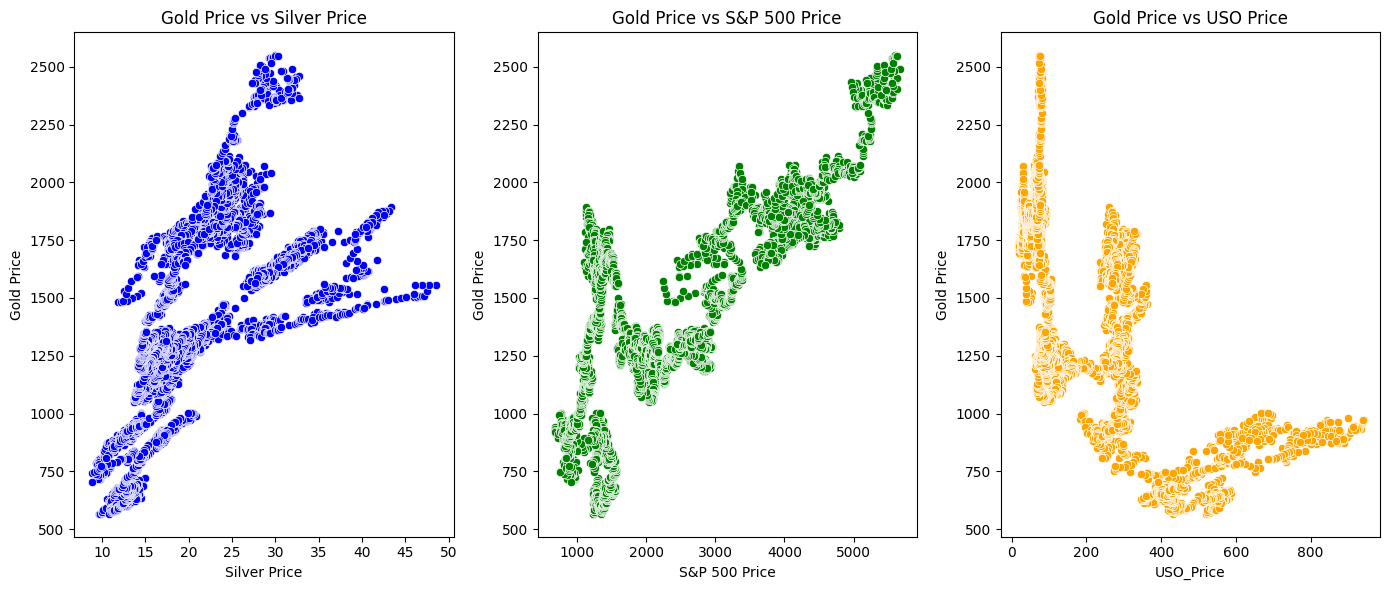

In [24]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Silver_Price', y='Gold_Price', data=combined_prices, color='blue')
plt.title('Gold Price vs Silver Price')
plt.xlabel('Silver Price')
plt.ylabel('Gold Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x='S&P_Price', y='Gold_Price', data=combined_prices, color='green')
plt.title('Gold Price vs S&P 500 Price')
plt.xlabel('S&P 500 Price')
plt.ylabel('Gold Price')

plt.subplot(1, 3, 3)
sns.scatterplot(x='USO_Price', y='Gold_Price', data=combined_prices, color='orange')
plt.title('Gold Price vs USO Price')
plt.xlabel('USO_Price')
plt.ylabel('Gold Price')

plt.tight_layout()
plt.show()

We can notice that Silver_Price and S&P_Price are quasi-linear with Gold_Price.

But first let's create lags variables for each feature to work with.

In [25]:
# The function that we are going to use to create lags
def lagsCol(df,cols,lag):
    for col in cols:
        df[col+"lag_"+str(lag)]= df[col].shift(lag)
    return df

In [26]:
lagged_data = lagsCol(combined_prices,["Gold_Price", "Silver_Price", "S&P_Price", "USO_Price", "Copper_Price"],lag=90) 
lagged_data = lagged_data.dropna()
lagged_data = lagged_data.drop(columns=["S&P_Price", "Silver_Price", "USO_Price", "Copper_Price"])
lagged_data.head()

,Gold_Price,Gold_Pricelag_90,Silver_Pricelag_90,S&P_Pricelag_90,USO_Pricelag_90,Copper_Pricelag_90
Date,,,,,,
2006-07-10,626.1,599.400,12.6000,1286.60,545.60,2.720500
2006-07-11,642.9,601.300,12.6630,1288.10,542.72,2.769500
2006-07-12,651.2,600.100,12.8550,1289.10,550.56,2.811500
2006-07-13,654.4,604.775,12.9825,1288.15,552.50,2.831875
2006-07-14,668.0,609.450,13.1100,1287.20,554.44,2.852250


Splitting data

In [27]:
lag_to_apply = 90
train_len = len(lagged_data)-lag_to_apply

train_data = lagged_data[:train_len]
test_data = lagged_data[train_len:]
data_to_forecast = combined_prices[train_len+lag_to_apply:]

X_train, y_train = train_data.drop(columns=['Gold_Price']), train_data['Gold_Price']
X_test, y_test = test_data.drop(columns=['Gold_Price']), data_to_forecast['Gold_Price']

In [28]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
train_forcast = LR_model.predict(X_train)
test_forcast = LR_model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# A function to evaluate our models
def evaluate_model(y_true, y_pred, data_type):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{data_type} - MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

In [30]:
print("LR model evaluation:")
evaluate_model(y_train, train_forcast, "Training")
evaluate_model(y_test, test_forcast, "Testing")

LR model evaluation:
Training - MSE: 10080.72, MAE: 77.78, R²: 0.93
Testing - MSE: 17628.47, MAE: 112.05, R²: -3.95


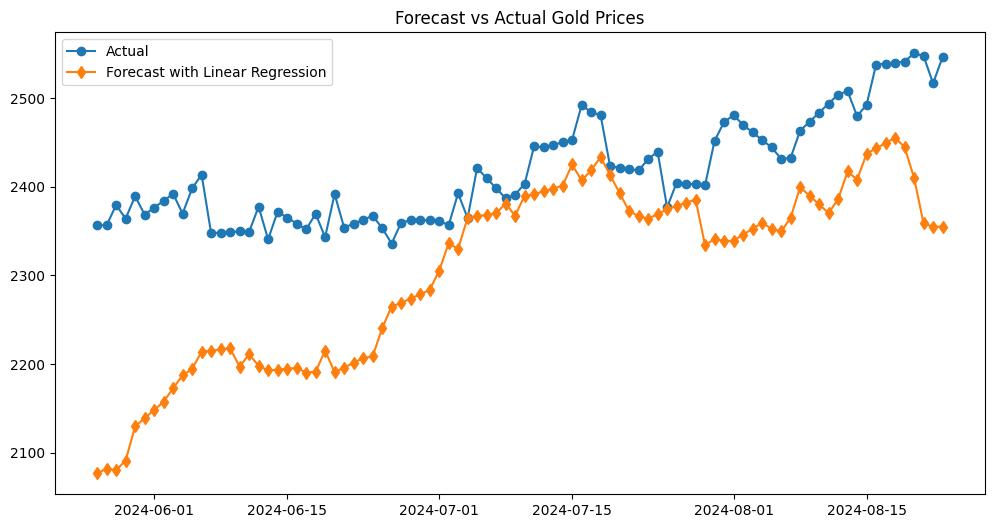

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_test.index, test_forcast, label='Forecast with Linear Regression', marker='d')
plt.legend()
plt.title('Forecast vs Actual Gold Prices')
plt.show()

In [32]:
lagged_data

,Gold_Price,Gold_Pricelag_90,Silver_Pricelag_90,S&P_Pricelag_90,USO_Pricelag_90,Copper_Pricelag_90
Date,,,,,,
2006-07-10,626.1,599.400000,12.6000,1286.60,545.6000,2.720500
2006-07-11,642.9,601.300000,12.6630,1288.10,542.7200,2.769500
2006-07-12,651.2,600.100000,12.8550,1289.10,550.5600,2.811500
2006-07-13,654.4,604.775000,12.9825,1288.15,552.5000,2.831875
2006-07-14,668.0,609.450000,13.1100,1287.20,554.4400,2.852250
...,...,...,...,...,...,...
2024-08-19,2541.3,2449.100000,32.4120,5321.41,76.1600,5.057000
2024-08-20,2550.6,2415.700000,31.8280,5307.01,74.8700,4.820000
2024-08-21,2547.5,2359.700000,30.7790,5267.84,74.4500,4.779500


Let's add some other engineered features

In [33]:
# Adding engineered features

eng_lagged_data = lagged_data.copy()
eng_lagged_data['SP_Gold_Interaction'] = eng_lagged_data['S&P_Pricelag_90'] * eng_lagged_data['Gold_Pricelag_90']
eng_lagged_data['Silver_Gold_Interaction'] = eng_lagged_data['Silver_Pricelag_90'] * eng_lagged_data['Gold_Pricelag_90']
eng_lagged_data['USO_Gold_Interaction'] = eng_lagged_data['USO_Pricelag_90'] * eng_lagged_data['Gold_Pricelag_90']

In [34]:
train_len = len(eng_lagged_data) - lag_to_apply

train_data = eng_lagged_data[:train_len]
test_data = eng_lagged_data[train_len:]
data_to_forecast = combined_prices[train_len + lag_to_apply:]

X_train, y_train = train_data.drop(columns=['Gold_Price']), train_data['Gold_Price']
X_test, y_test = test_data.drop(columns=['Gold_Price']), data_to_forecast['Gold_Price']


In [35]:
LR_model_ENG = LinearRegression()
LR_model_ENG.fit(X_train, y_train)

eng_train_forecast = LR_model_ENG.predict(X_train)
eng_test_forecast = LR_model_ENG.predict(X_test)

print("Model evaluation with engineered features:")
evaluate_model(y_train, eng_train_forecast, "Training")
evaluate_model(y_test, eng_test_forecast, "Testing")

Model evaluation with engineered features:
Training - MSE: 9604.98, MAE: 76.31, R²: 0.94
Testing - MSE: 6792.98, MAE: 62.20, R²: -0.91


Let's test Polynomial regression.

In [36]:
lagged_data

,Gold_Price,Gold_Pricelag_90,Silver_Pricelag_90,S&P_Pricelag_90,USO_Pricelag_90,Copper_Pricelag_90
Date,,,,,,
2006-07-10,626.1,599.400000,12.6000,1286.60,545.6000,2.720500
2006-07-11,642.9,601.300000,12.6630,1288.10,542.7200,2.769500
2006-07-12,651.2,600.100000,12.8550,1289.10,550.5600,2.811500
2006-07-13,654.4,604.775000,12.9825,1288.15,552.5000,2.831875
2006-07-14,668.0,609.450000,13.1100,1287.20,554.4400,2.852250
...,...,...,...,...,...,...
2024-08-19,2541.3,2449.100000,32.4120,5321.41,76.1600,5.057000
2024-08-20,2550.6,2415.700000,31.8280,5307.01,74.8700,4.820000
2024-08-21,2547.5,2359.700000,30.7790,5267.84,74.4500,4.779500


In [37]:
poly_lagged_data = lagged_data.copy()
poly_lagged_data['Silver_Pricelag_90_pw_2'] = poly_lagged_data['Silver_Pricelag_90'] ** 2
poly_lagged_data['S&P_Pricelag_90_pw_2'] = poly_lagged_data['S&P_Pricelag_90'] ** 2
poly_lagged_data['Copper_Pricelag_90_pw_2'] = poly_lagged_data['Copper_Pricelag_90'] ** 2

In [38]:
poly_lagged_data

,Gold_Price,Gold_Pricelag_90,Silver_Pricelag_90,S&P_Pricelag_90,USO_Pricelag_90,Copper_Pricelag_90,Silver_Pricelag_90_pw_2,S&P_Pricelag_90_pw_2,Copper_Pricelag_90_pw_2
Date,,,,,,,,,
2006-07-10,626.1,599.400000,12.6000,1286.60,545.6000,2.720500,158.760000,1.655340e+06,7.401120
2006-07-11,642.9,601.300000,12.6630,1288.10,542.7200,2.769500,160.351569,1.659202e+06,7.670130
2006-07-12,651.2,600.100000,12.8550,1289.10,550.5600,2.811500,165.251025,1.661779e+06,7.904532
2006-07-13,654.4,604.775000,12.9825,1288.15,552.5000,2.831875,168.545306,1.659330e+06,8.019516
2006-07-14,668.0,609.450000,13.1100,1287.20,554.4400,2.852250,171.872100,1.656884e+06,8.135330
...,...,...,...,...,...,...,...,...,...
2024-08-19,2541.3,2449.100000,32.4120,5321.41,76.1600,5.057000,1050.537744,2.831740e+07,25.573249
2024-08-20,2550.6,2415.700000,31.8280,5307.01,74.8700,4.820000,1013.021584,2.816436e+07,23.232400
2024-08-21,2547.5,2359.700000,30.7790,5267.84,74.4500,4.779500,947.346841,2.775014e+07,22.843620


In [39]:
lag_to_apply = 90
train_len = len(poly_lagged_data)-lag_to_apply

train_data = poly_lagged_data[:train_len]
test_data = poly_lagged_data[train_len:]
data_to_forecast = combined_prices[train_len+lag_to_apply:]

X_train, y_train = train_data.drop(columns=['Gold_Price']), train_data['Gold_Price']
X_test, y_test = test_data.drop(columns=['Gold_Price']), data_to_forecast['Gold_Price']


In [40]:
PR_model = LinearRegression()
PR_model.fit(X_train, y_train)
train_poly_predictions = PR_model.predict(X_train)
test_poly_predictions = PR_model.predict(X_test)

In [41]:
print("PR model evaluation:")
evaluate_model(y_train, train_poly_predictions, "Training")
evaluate_model(y_test, test_poly_predictions, "Testing")

PR model evaluation:
Training - MSE: 9020.26, MAE: 74.93, R²: 0.94
Testing - MSE: 4559.38, MAE: 55.49, R²: -0.28


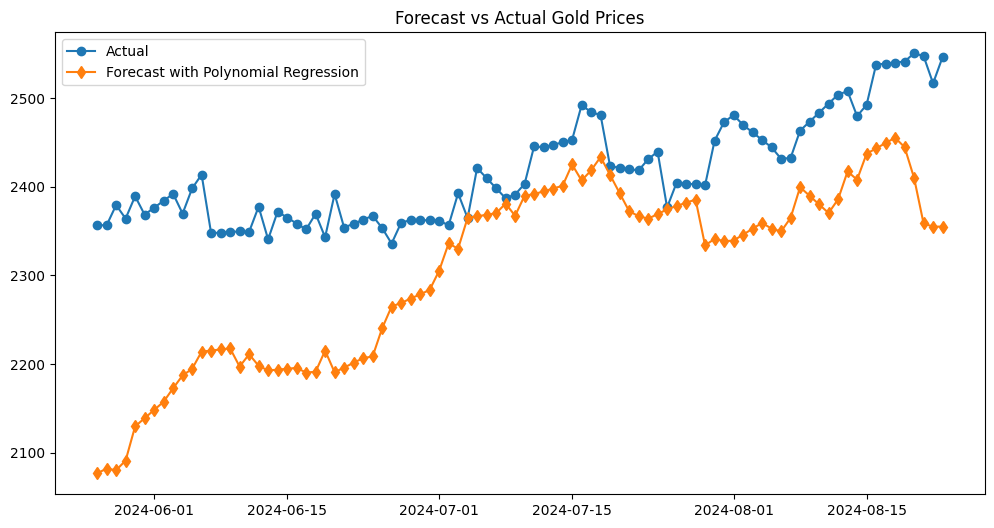

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_test.index, test_forcast, label='Forecast with Polynomial Regression', marker='d')
plt.legend()
plt.title('Forecast vs Actual Gold Prices')
plt.show()

Let's verify with TimeSeriesSplit

In [43]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3)

X_train = poly_lagged_data.drop(columns=['Gold_Price'])
y_train = poly_lagged_data["Gold_Price"]

for train_idx, val_idx in tscv.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    PR_model.fit(X_train_cv, y_train_cv)
    val_forecast = PR_model.predict(X_val_cv)

    evaluate_model(y_val_cv, val_forecast, "Validation split")

Validation split - MSE: 131856.24, MAE: 311.83, R²: -2.17
Validation split - MSE: 7461.15, MAE: 69.35, R²: 0.40
Validation split - MSE: 59001.80, MAE: 209.16, R²: -0.58


The R² values vary widely, from negative values to a maximum of 0.64. This inconsistency indicates that the model's predictive capability is unstable across time periods.

Testing SARIMAX

In [44]:
# Evaluation function for SARIMAX
def evaluate_sarimax(y_true, y_pred, stage):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{stage} - MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

Sarimax with lagged simple features

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

lagged_data = lagged_data.asfreq('D') 

X_train = lagged_data.drop(columns=['Gold_Price'])
y_train = lagged_data['Gold_Price']


lag_to_apply = 90
train_len = len(lagged_data) - lag_to_apply
X_train, X_test = X_train.iloc[:train_len], X_train.iloc[train_len:]
y_train, y_test = y_train.iloc[:train_len], y_train.iloc[train_len:]


sarimax_model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results = sarimax_model.fit(disp=False)


train_forecast = sarimax_results.get_prediction(start=0, end=len(X_train)-1, exog=X_train).predicted_mean
evaluate_sarimax(y_train, train_forecast, "Training")


test_forecast = sarimax_results.get_forecast(steps=len(X_test), exog=X_test).predicted_mean
evaluate_sarimax(y_test, test_forecast, "Testing")


Training - MSE: 210.43, MAE: 7.46, R²: 1.00
Testing - MSE: 5158.48, MAE: 52.69, R²: -0.45


Sarimax with polynomial lagged features

In [46]:
poly_lagged_data = poly_lagged_data.asfreq('D') 

X_train = poly_lagged_data.drop(columns=['Gold_Price'])
y_train = poly_lagged_data['Gold_Price']

lag_to_apply = 90
train_len = len(poly_lagged_data) - lag_to_apply
X_train, X_test = X_train.iloc[:train_len], X_train.iloc[train_len:]
y_train, y_test = y_train.iloc[:train_len], y_train.iloc[train_len:]


sarimax_model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results = sarimax_model.fit(disp=False)


train_sarimax_predictions = sarimax_results.get_prediction(start=0, end=len(X_train)-1, exog=X_train).predicted_mean
evaluate_sarimax(y_train, train_sarimax_predictions, "Training")


test_sarimax_predictions = sarimax_results.get_forecast(steps=len(X_test), exog=X_test).predicted_mean
evaluate_sarimax(y_test, test_sarimax_predictions, "Testing")


d:\Programs\Python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training - MSE: 226.36, MAE: 8.31, R²: 1.00
Testing - MSE: 1486.66, MAE: 32.21, R²: 0.58


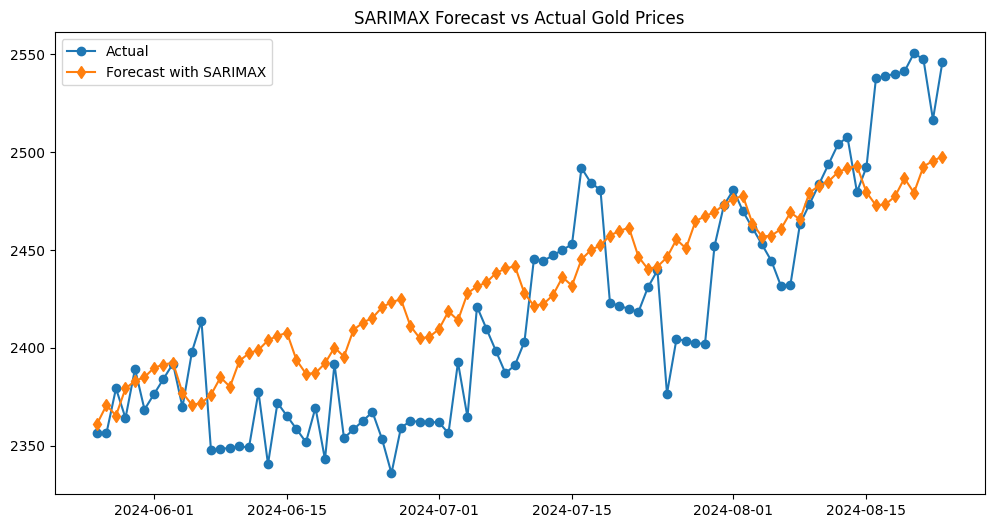

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_test.index, test_sarimax_predictions, label='Forecast with SARIMAX', marker='d')
plt.legend()
plt.title('SARIMAX Forecast vs Actual Gold Prices')
plt.show()

Testing Ensemble learning approach

Since both Polynomial Regression and SARIMAX models have shown promise in different ways. Combining them could leverage their strengths and potentially improve the overall performance, so let's do Ensemble learning between the two.

In [48]:
# funct to evaluate the ensemble learning
def evaluate_ensemble(w_poly, w_sarimax, y_true, poly_preds, sarimax_preds):
    ensemble_preds = w_poly * poly_preds + w_sarimax * sarimax_preds
    mse = mean_squared_error(y_true, ensemble_preds)
    r2 = r2_score(y_true, ensemble_preds)
    return mse, r2

In [49]:
import numpy as np

weights = np.linspace(0, 1, 101) 
best_mse = float('inf')
best_r2 = -float('inf')
best_weights = (0, 0)


for w_poly in weights:
    w_sarimax = 1 - w_poly
    mse, r2 = evaluate_ensemble(w_poly, w_sarimax, y_test, test_poly_predictions, test_sarimax_predictions)
    
    if mse < best_mse:
        best_mse = mse
        best_r2 = r2
        best_weights = (w_poly, w_sarimax)

print(f"Best Weights: Polynomial Regression = {best_weights[0]:.2f}, SARIMAX = {best_weights[1]:.2f}")
print(f"Best Test MSE: {best_mse:.2f}, Best Test R²: {best_r2:.2f}")


Best Weights: Polynomial Regression = 0.17, SARIMAX = 0.83
Best Test MSE: 1359.86, Best Test R²: 0.62


In [50]:
train_ensemble_predictions = 0.17 * train_poly_predictions + 0.83 * train_sarimax_predictions
test_ensemble_predictions = 0.17 * test_poly_predictions + 0.83 * test_sarimax_predictions

In [51]:
evaluate_model(y_train, train_ensemble_predictions, "Train ensemble")
evaluate_model(y_test, test_ensemble_predictions, "Tets ensemble")

Train ensemble - MSE: 424.55, MAE: 14.82, R²: 1.00
Tets ensemble - MSE: 1359.86, MAE: 30.31, R²: 0.62


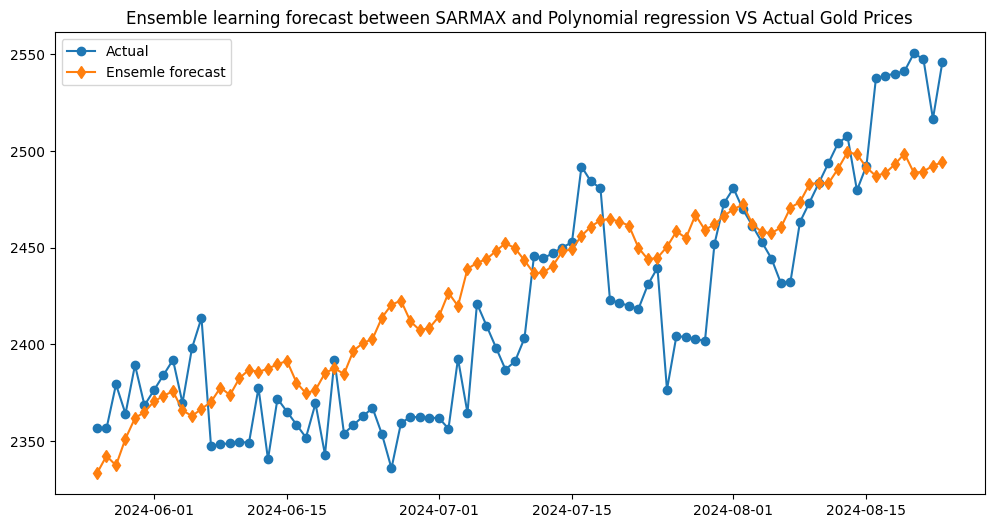

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_test.index, test_ensemble_predictions, label='Ensemle forecast', marker='d')
plt.legend()
plt.title('Ensemble learning forecast between SARMAX and Polynomial regression VS Actual Gold Prices')
plt.show()

In [53]:

train_ensemble_predictions1 = 0.10 * eng_train_forecast + 0.10 * train_poly_predictions + 0.80 * train_sarimax_predictions
test_ensemble_predictions1 = 0.10 * eng_test_forecast + 0.10 * test_poly_predictions + 0.80 * test_sarimax_predictions

In [54]:
evaluate_model(y_train, train_ensemble_predictions1, "Train ensemble")
evaluate_model(y_test, test_ensemble_predictions1, "Tets ensemble")

Train ensemble - MSE: 513.42, MAE: 16.64, R²: 1.00
Tets ensemble - MSE: 1295.36, MAE: 29.82, R²: 0.64


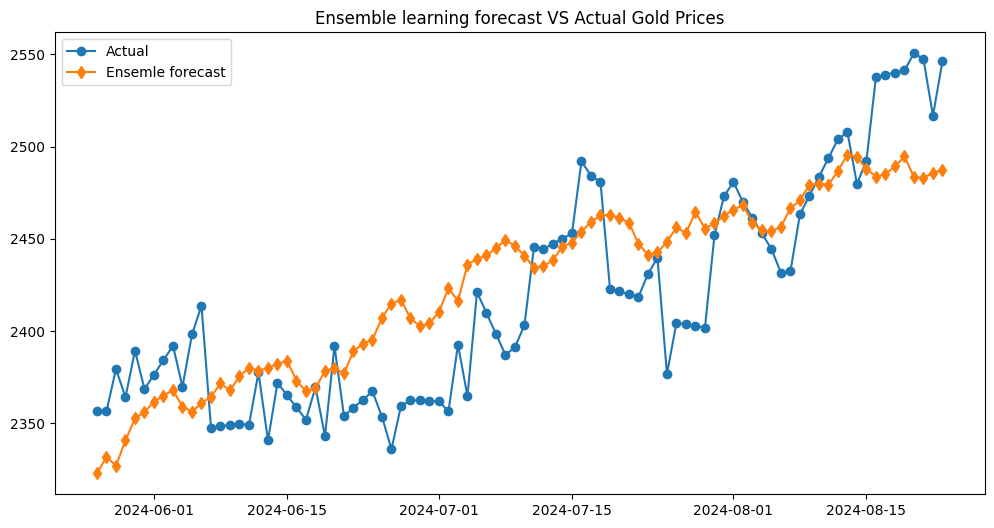

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_test.index, test_ensemble_predictions1, label='Ensemle forecast', marker='d')
plt.legend()
plt.title('Ensemble learning forecast VS Actual Gold Prices')
plt.show()

Testing prophet model

In [56]:
from prophet import Prophet
import pandas as pd

prophet_data = poly_lagged_data.reset_index() 
prophet_data = prophet_data.rename(columns={"Date": "ds", "Gold_Price": "y"}) 

prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])

prophet_model = Prophet()

regressors = ['Gold_Pricelag_90', 'Silver_Pricelag_90', 'S&P_Pricelag_90', 
              'USO_Pricelag_90', 'Copper_Pricelag_90', 
              'Silver_Pricelag_90_pw_2', 'S&P_Pricelag_90_pw_2', 'Copper_Pricelag_90_pw_2']
for regressor in regressors:
    prophet_model.add_regressor(regressor)

lag_to_apply = 90
train_len = len(prophet_data) - lag_to_apply
train_data = prophet_data.iloc[:train_len]
test_data = prophet_data.iloc[train_len:]

prophet_model.fit(train_data[['ds', 'y'] + regressors])

future = prophet_data[['ds'] + regressors]

forecast = prophet_model.predict(future)

prophet_train_forecast = forecast.iloc[:train_len]["yhat"]
prophet_test_forecast = forecast.iloc[train_len:]["yhat"]

00:16:10 - cmdstanpy - INFO - Chain [1] start processing
00:16:35 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
print("Prophet model evaluation:")
evaluate_model(train_data['y'], prophet_train_forecast, "Prophet Train")
evaluate_model(test_data['y'], prophet_test_forecast, "Prophet Test")

Prophet model evaluation:
Prophet Train - MSE: 3715.79, MAE: 45.90, R²: 0.98
Prophet Test - MSE: 24280.89, MAE: 143.51, R²: -5.81


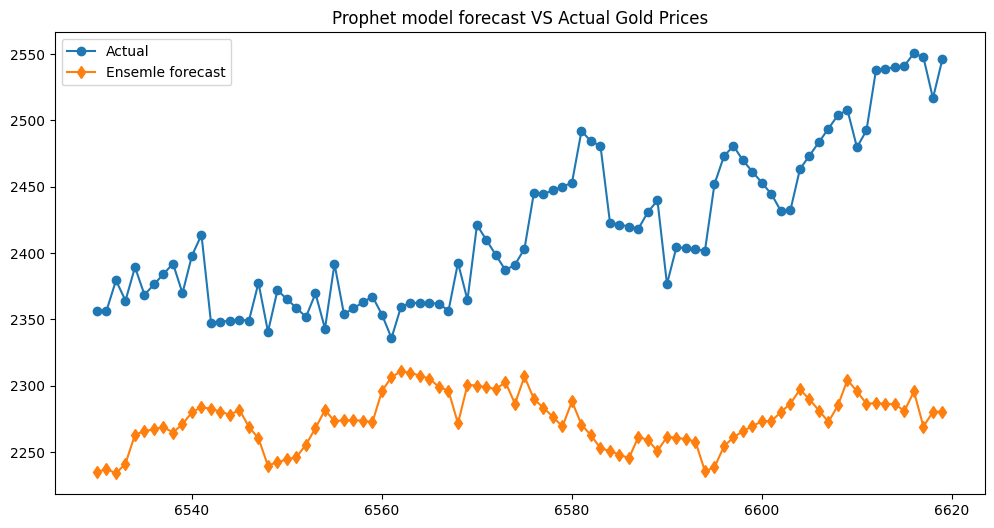

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['y'], label='Actual', marker='o')
plt.plot(test_data['y'].index, prophet_test_forecast, label='Ensemle forecast', marker='d')
plt.legend()
plt.title('Prophet model forecast VS Actual Gold Prices')
plt.show()

Let's add the prophet model to our previous ensemble learning model

First let's align Prophet predictions with other models

In [75]:
prophet_train_forecast_aligned = prophet_train_forecast.reset_index(drop=True)
prophet_train_forecast_aligned.index = y_train.index 


prophet_test_forecast_aligned = prophet_test_forecast.reset_index(drop=True)
prophet_test_forecast_aligned.index = y_test.index 

Determining the optimum weights for our ensemble model

In [76]:
from scipy.optimize import minimize
import numpy as np


def optimize_weights(weights):
    """
    Objective function to minimize: Mean Squared Error (MSE) on test set.
    weights: A list of weights [w1, w2, w3, w4] for the four models.
    """

    weights = np.array(weights)
    weights = weights / weights.sum()

    test_ensemble_predictions = (
        weights[0] * eng_test_forecast +
        weights[1] * test_poly_predictions +
        weights[2] * test_sarimax_predictions +
        weights[3] * prophet_test_forecast_aligned
    )


    mse = ((y_test - test_ensemble_predictions) ** 2).mean()
    return mse

initial_weights = [0.25, 0.25, 0.25, 0.25]

constraints = {"type": "eq", "fun": lambda w: np.sum(w) - 1}

bounds = [(0, 1) for _ in range(4)]

result = minimize(optimize_weights, initial_weights, bounds=bounds, constraints=constraints)

optimal_weights = result.x / np.sum(result.x)  
print("Optimal Weights:", optimal_weights)

train_ensemble_predictions_opt = (
    optimal_weights[0] * eng_train_forecast +
    optimal_weights[1] * train_poly_predictions +
    optimal_weights[2] * train_sarimax_predictions +
    optimal_weights[3] * prophet_train_forecast_aligned
)

test_ensemble_predictions_opt = (
    optimal_weights[0] * eng_test_forecast +
    optimal_weights[1] * test_poly_predictions +
    optimal_weights[2] * test_sarimax_predictions +
    optimal_weights[3] * prophet_test_forecast_aligned
)

evaluate_model(y_train, train_ensemble_predictions_opt, "Train ensemble with optimized weights")
evaluate_model(y_test, test_ensemble_predictions_opt, "Test ensemble with optimized weights")


Optimal Weights: [0.05152273 0.10031484 0.79647104 0.05169139]
Train ensemble with optimized weights - MSE: 433.92, MAE: 15.05, R²: 1.00
Test ensemble with optimized weights - MSE: 1245.58, MAE: 29.49, R²: 0.65


In [77]:
weight_engineered_features = 0.05
weight_polynomial_regression = 0.10
weight_sarimax = 0.80
weight_prophet = 0.05


train_ensemble_predictions2 = (
    weight_engineered_features * eng_train_forecast +
    weight_polynomial_regression * train_poly_predictions +
    weight_sarimax * train_sarimax_predictions +
    weight_prophet * prophet_train_forecast_aligned
)

test_ensemble_predictions2 = (
    weight_engineered_features * eng_test_forecast +
    weight_polynomial_regression * test_poly_predictions +
    weight_sarimax * test_sarimax_predictions +
    weight_prophet * prophet_test_forecast_aligned
)


evaluate_model(y_train, train_ensemble_predictions2, "Train ensemble with Prophet")
evaluate_model(y_test, test_ensemble_predictions2, "Test ensemble with Prophet")

Train ensemble with Prophet - MSE: 426.57, MAE: 14.89, R²: 1.00
Test ensemble with Prophet - MSE: 1245.73, MAE: 29.48, R²: 0.65


Calculating the accuracy of our ensemble learnig model

In [78]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, test_ensemble_predictions2)
Accuracy = 1 - MAPE
print(f"The accuracy of the model:",Accuracy*100,"%")

The accuracy of the model: 98.78215015039177 %


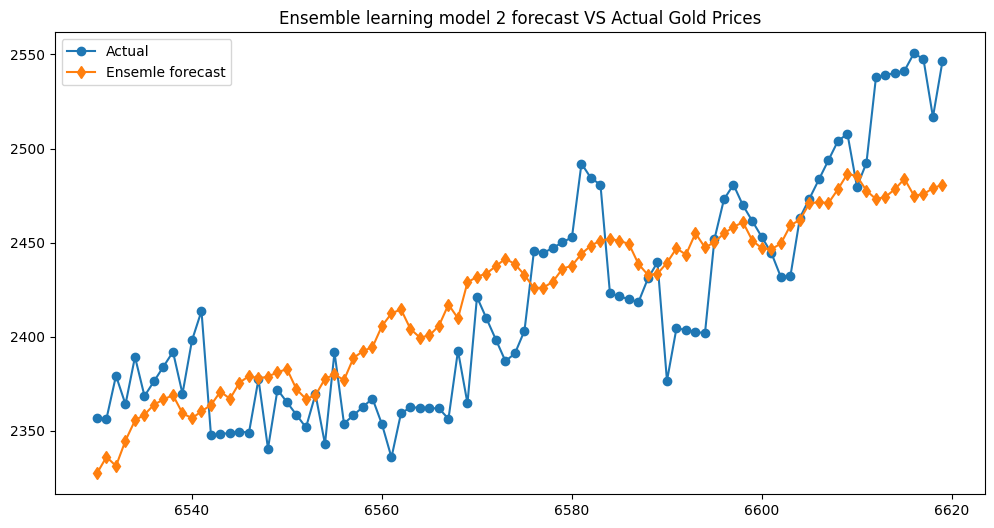

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['y'], label='Actual', marker='o')
plt.plot(test_data['y'].index, test_ensemble_predictions2, label='Ensemle forecast', marker='d')
plt.legend()
plt.title('Ensemble learning model 2 forecast VS Actual Gold Prices')
plt.show()